# Intra-Cluster Light (ICL) profiles analysis in the Dark Energy Survey (DES)




In [2]:
%matplotlib inline
import healpy as hp
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from healpy.rotator import Rotator
import kmeans_radec
from kmeans_radec import KMeans, kmeans_sample
import os
import os.path
import configparser
import sys
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from astropy.table import Table

/home/hillysson/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Random points

In [3]:
ini_file= 'rand_y1.ini'
config = configparser.ConfigParser()
inifile = config.read(ini_file)
input_dir_rand=config.get('input', 'input_dir')
catalog_rand=config.get('input', 'catalog_file')
flag_files_rand=[ii.strip() for ii in config.get('input', 'flag_files').split(',')]
save_dir_rand=config.get('output', 'save_dir')
grid_output_dir_rand=config.get('grid_output', 'save_dir')
rand=pyfits.open(catalog_rand)[1].data
flags_rand=np.zeros(len(rand))+1
indices_rand=np.arange(len(rand))


cc=0
for file_flag in flag_files_rand:
    #if cc==1:
    #    continue
    if os.path.isfile(file_flag):
        flag_dat=np.loadtxt(file_flag, dtype=[('index', int), ('flag', int)], skiprows=1)
        flag=flag_dat['flag']
        print(sum(flag))
        if len(flag) == len(flags_rand):
            flags_rand=flags_rand*flag
    cc=cc+1
ind_rand, =np.where( (flags_rand > 0.5) & (flags_rand<1.5) )
print(len(ind_rand), len(indices_rand))



4227
9161
3859 10000


In [4]:
catalog_rand

'/home/hillysson/diffuselight_dataproc/dlight/input/y1a1_gold_1.0.3_wide+d10-mof-001d_run_redmapper_v6.4.17-2_randcat_z0.10-0.95_lgt020_vl02_extraction_10000.fit'

#### Removing indices that has no profiles

In [5]:
####
second_path_rand = 'rand6417_output_mask35/'
dat_type=[('distance', float), ('mean', float), ('median', float)]

to_be_removed = []

for jji, jj in enumerate(ind_rand):  # jji is an index from 0 to 356
                                # jj is the cluster id
    print(jj)

    file_jj_r=input_dir_rand+second_path_rand+'object_%i/profile_%i_r.txt'%(jj,jj)


    if os.path.isfile(file_jj_r):
        continue
    else:
        print('there is no profile for the cluster with index '+str(jj))
        to_be_removed.append(jj)

# remove the clusters indices that there is no profiles
for rem in to_be_removed:
    ind_rand = np.delete(ind_rand, list(ind_rand).index(rem))
    
print('total number of clusters to use: '+str(len(ind_rand)))
        

0
there is no profile for the cluster with index 0
3
9
16
23
24
25
27
30
33
35
there is no profile for the cluster with index 35
43
48
56
57
59
there is no profile for the cluster with index 59
61
64
66
75
80
83
89
92
97
98
104
107
108
114
118
121
124
125
128
129
131
132
133
136
137
138
140
144
147
149
150
151
there is no profile for the cluster with index 151
152
there is no profile for the cluster with index 152
154
156
162
164
171
173
181
182
183
186
187
190
193
194
198
199
200
201
206
208
213
214
216
217
219
221
223
224
234
235
237
239
242
245
247
there is no profile for the cluster with index 247
251
252
253
257
260
261
262
263
268
272
there is no profile for the cluster with index 272
273
275
276
277
278
279
281
282
283
286
287
288
290
292
295
296
297
298
299
there is no profile for the cluster with index 299
302
305
there is no profile for the cluster with index 305
306
314
there is no profile for the cluster with index 314
315
316
319
324
329
331
337
339
340
343
344
there is no

2702
2703
2705
2706
2710
2712
2713
2714
2715
2717
there is no profile for the cluster with index 2717
2719
2720
2723
2726
there is no profile for the cluster with index 2726
2727
2728
2731
2733
2737
2738
2739
2740
2743
2745
2752
2756
there is no profile for the cluster with index 2756
2759
there is no profile for the cluster with index 2759
2760
2761
2765
2767
2768
there is no profile for the cluster with index 2768
2773
2774
there is no profile for the cluster with index 2774
2775
2776
2781
2788
2797
2798
2799
2812
2813
there is no profile for the cluster with index 2813
2815
2817
2822
2823
2824
2827
2832
2833
2835
2839
2840
2841
2845
2846
2848
2853
2858
2859
2866
2876
2879
2883
2886
2893
2898
2899
2900
2903
2906
2908
2910
2911
2914
2915
2916
2917
2918
2919
2920
2921
2922
2932
2934
2941
2943
2946
2948
2949
2951
2954
2955
2957
2958
2962
2964
2965
2969
there is no profile for the cluster with index 2969
2971
2974
2977
2980
2981
2983
2986
2990
2991
2994
2995
2996
2997
2999
there is no pr

5507
5508
5509
5510
5513
5515
5518
5520
5523
5525
5526
5529
5531
5533
5534
5535
5537
5546
there is no profile for the cluster with index 5546
5548
5551
5554
5557
5560
5561
5566
5571
5572
5573
there is no profile for the cluster with index 5573
5574
5578
5581
5583
5586
5593
5597
5598
5600
5603
5605
5607
5608
5611
5612
5613
5616
5617
5619
5620
5622
5626
5628
5630
5633
5636
5640
5644
5648
5651
5652
5658
5662
5665
5667
5669
5675
5676
5680
5682
5683
5684
5685
5697
5699
5700
5708
5709
5710
5713
5714
5715
5717
5720
5726
5729
5730
5733
5736
5738
5739
5744
5754
5755
5756
5757
5758
5761
5762
there is no profile for the cluster with index 5762
5763
5764
there is no profile for the cluster with index 5764
5765
5768
5769
5773
5776
5782
5783
5786
5788
5789
there is no profile for the cluster with index 5789
5795
5796
5801
5802
5807
5808
5819
5824
5828
5830
5832
5834
5846
5848
5851
5854
5860
5861
5869
5870
5871
5872
5873
5874
5875
5877
5878
5880
5881
5882
5883
5884
5885
5886
5887
5891
there is no pro

9206
9208
9216
9218
9219
9220
9224
9227
9230
9232
9234
9237
9244
9245
9246
9248
9253
9254
9255
9256
9260
9261
9262
9263
9265
9269
9272
9277
9283
9284
9285
9298
9300
9301
9302
9307
9317
9318
9319
9321
9322
9324
9326
9327
9329
9330
9333
9338
9339
9340
9344
9345
9347
9351
9355
9358
9359
9360
9362
9364
9366
9368
9372
9374
9376
9377
9379
9380
9381
9382
9384
9386
9394
9395
9398
9402
9406
9407
9409
9411
9413
9417
9418
9419
9422
9423
9427
9428
9429
9431
9435
9436
9437
9438
9441
9442
9445
9446
9452
9455
9462
9468
9472
9473
9475
9476
9478
9483
9488
9493
9495
9504
9505
9508
9511
9512
9513
9514
9516
9521
9522
9524
9526
9530
9545
9547
9550
9551
9554
9558
9559
9565
9571
9573
9574
9576
9579
9583
9586
9587
9589
9597
9602
9610
9612
9617
9618
9620
9626
9627
9632
9635
9636
9639
9648
9650
9654
9658
9662
9665
9667
9672
9675
9678
9681
9687
9689
9692
9697
9707
9709
9711
9716
9718
9723
9727
9731
9732
9734
9735
9736
9745
9746
9747
9749
9752
9753
9754
9757
9760
9764
9765
9769
9770
9771
9774
9775
9779
9781
9783


#### The funtion below is for getting the mean random profile for a given redshift

In [6]:
def z_to_mean(ind_rand, nbins, input_dir, second_path):
    
    ####
    input_dir='/home/hillysson/diffuselight_dataproc/dlight/'
    second_path='rand6417_output_mask35/'
    dat_type=[('distance', float), ('mean', float), ('median', float)]
    data_temp=np.loadtxt(input_dir+second_path+'object_%i/profile_%i_r.txt'%(ind_rand[0],ind_rand[0]), dtype=dat_type)

    
    ncluster=len(ind_rand)
    yy_r=np.zeros([nbins, ncluster])+99999
    xx=np.zeros([nbins, ncluster])+99999
    

    for jji, jj in enumerate(ind_rand):

        file_jj_r=input_dir+second_path+'object_%i/profile_%i_r.txt'%(jj,jj)
        
        if os.path.isfile(file_jj_r):
            data_r=np.loadtxt(file_jj_r, dtype=dat_type)

            if len(data_r['distance'])==nbins:
                yy_r[:, jji]=data_r['mean']#*yyfactor
                xx[:, jji]=data_temp['distance']#*xxfactor

                

    ## jacknife sampling
    from astropy.io.fits import Column

    # getting the center position of rdmp clusters
    #coord_rdmp=np.transpose( np.array([rdmp[ind]['ra'], rdmp[ind]['dec']]) )
    ncen = 40

    if os.path.isfile('centers.txt') == 0: #this is false, so the code is jumping this part
        km = kmeans_sample(coord_rdmp, ncen, maxiter=100, tol=1.0e-5)
        print("found centers:",km.centers)
        print("converged?",km.converged)
        np.savetxt('centers.txt', km.centers)
    centers=np.loadtxt('centers.txt')

    # find the rdmp cluster closest to the center of the region:
    coord_rand=np.transpose( np.array([rand[ind_rand]['ra'], rand[ind_rand]['dec']]) )
    labels_rand=kmeans_radec.find_nearest(coord_rand, centers)
    #print(labels_rand)
    print(str(len(labels_rand))+' random points')
    print('  ')


    len_kmeans=centers.shape[0] # 40, number of regions
    dir_ind='/home/hillysson/diffuselight_dataproc/dlight/output/redmapper_y1_jacknife_sub_profiles/'
    os.system('mkdir '+dir_ind)
    

    c0=Column(name='Jacknife_index', format='K')
    c1=Column(name='x_axis', format='%iE'%nbins)
    c2=Column(name='mean', format='%iE'%nbins)
    cols = pyfits.ColDefs([c0, c1, c2])
    hdu = pyfits.BinTableHDU.from_columns(cols, nrows=len_kmeans)

    for ii in range(len_kmeans): # binning in kmean regions

        # subtracting clusters that belong to this region
        ind_rand,=np.where( (labels_rand == ii) )    
        print('region %i:'%(ii))
        print(str(len(labels_rand)-len(ind_rand))+' cluster(s) were removed')
        print(str(len(ind_rand))+' cluster(s) were used')
        print('')

        yyrmean_ind=np.zeros(nbins)    
        for jj in range(nbins): # binning in radius        
            temp_r_mean =yy_r[jj, :]        
            ind_temp, =np.where((temp_r_mean < 30000) & (temp_r_mean >-30000) & \
                                (labels_rand == ii) )        
            arr=temp_r_mean[ind_temp]
            yyrmean_ind[jj]=np.mean(arr)

        hdu.data[ii]['Jacknife_index']=ii
        hdu.data[ii]['x_axis']=xx.T[0]
        hdu.data[ii]['mean']=yyrmean_ind
    
    rand_mean, err=jacknife_statistics(hdu.data['mean'])
    xx_arr = hdu.data['x_axis']
    yy_arr = hdu.data['mean']
    
    
    return xx_arr, yy_arr, rand_mean, err

def jacknife_statistics(dat1, dat2 = np.zeros(1)):

    njack, narray = dat1.shape
    if dat1.shape != dat2.shape:
        dat2 = np.zeros([njack, narray]) # alternatively dat2 is 0
        print('no second array, using 0')
    mean = np.zeros(narray); err = np.zeros(narray)
    err_factor = np.sqrt(njack-1)

    for ii in range(narray):
        bkg = 0#dat1[:, narray-1] - dat2[:, narray-1] # 0 for default
        mean[ii] = np.mean(dat1[:, ii] - dat2[:, ii]-bkg)
        err[ii] = np.std(dat1[:, ii] - dat2[:, ii]-bkg) * err_factor
    return mean, err


#nbins=359
#xxbins = np.arange(0.0,2000.1, 2000/nbins )
xx_rand, yy_rand, yy_r_rand, err =z_to_mean( ind_rand, 359, '/home/hillysson/diffuselight_dataproc/dlight/', 'rand6417_output_mask35/')
#rand=pyfits.open('/home/hillysson/diffuselight_dataproc/dlight/output/redmapper_y1_jacknife_sub_profiles/'+'jacknife_profile_r.fits')[1].data['mean']
#xx_rand, yy_r_rand=jacknife_statistics(rand)



3700 random points
  
region 0:
3636 cluster(s) were removed
64 cluster(s) were used

region 1:
3607 cluster(s) were removed
93 cluster(s) were used

region 2:
3605 cluster(s) were removed
95 cluster(s) were used

region 3:
3520 cluster(s) were removed
180 cluster(s) were used

region 4:
3611 cluster(s) were removed
89 cluster(s) were used

region 5:
3599 cluster(s) were removed
101 cluster(s) were used



/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in greater


region 6:
3622 cluster(s) were removed
78 cluster(s) were used

region 7:
3657 cluster(s) were removed
43 cluster(s) were used

region 8:
3691 cluster(s) were removed
9 cluster(s) were used

region 9:
3619 cluster(s) were removed
81 cluster(s) were used

region 10:
3616 cluster(s) were removed
84 cluster(s) were used

region 11:
3606 cluster(s) were removed
94 cluster(s) were used

region 12:
3528 cluster(s) were removed
172 cluster(s) were used

region 13:
3634 cluster(s) were removed
66 cluster(s) were used

region 14:
3603 cluster(s) were removed
97 cluster(s) were used

region 15:
3599 cluster(s) were removed
101 cluster(s) were used

region 16:
3684 cluster(s) were removed
16 cluster(s) were used

region 17:
3600 cluster(s) were removed
100 cluster(s) were used

region 18:
3600 cluster(s) were removed
100 cluster(s) were used

region 19:
3586 cluster(s) were removed
114 cluster(s) were used

region 20:
3560 cluster(s) were removed
140 cluster(s) were used

region 21:
3621 cluster(

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


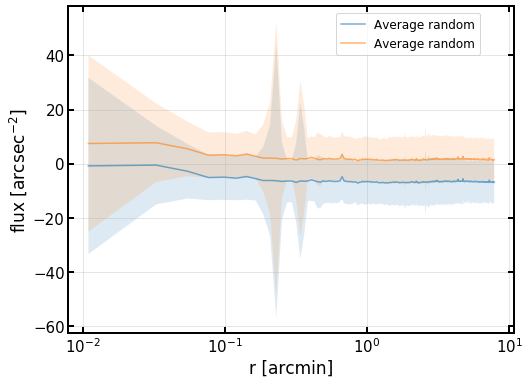

In [7]:
mask = xx_rand[0]>xx_rand[0][299]
km_re=1 # km_re = kmeans region
ytemp_rand, =np.where((np.array(yy_rand[km_re][mask]) < 300000) & (np.array(yy_rand[km_re][mask]) >-300000))
y_non_nan= np.array(yy_rand[km_re][mask])[ytemp_rand]
mean_rand= np.mean(y_non_nan) # all of them have -0.49

yyfactorr = 1.0/(0.263)**2
skyback = mean_rand*yyfactorr


fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
#plt.yscale('symlog')

plt.grid(alpha=0.4)


mea = yy_rand[0]*yyfactorr
up = (yy_rand[0]+err)*yyfactorr
low = (yy_rand[0]-err)*yyfactorr

plt.plot(xx_rand[0]*0.263/60, mea, '-', lw=1.5,alpha=0.6,label='Average random')
plt.fill_between(xx_rand[0]*0.263/60, up, low, alpha=0.15, label='')


mea0 = mea-skyback 
up0 = up-skyback 
low0 = low-skyback 
plt.plot(xx_rand[0]*0.263/60, mea0, '-', lw=1.5,alpha=0.6,label='Average random')
plt.fill_between(xx_rand[0]*0.263/60, up0, low0, alpha=0.15, label='')


plt.ylabel('flux [arcsec$^{-2}$]', fontsize=17)
plt.xlabel('r [arcmin]', fontsize=17)
#plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=2.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=2.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.6, 0.98), loc=2, fontsize=12,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


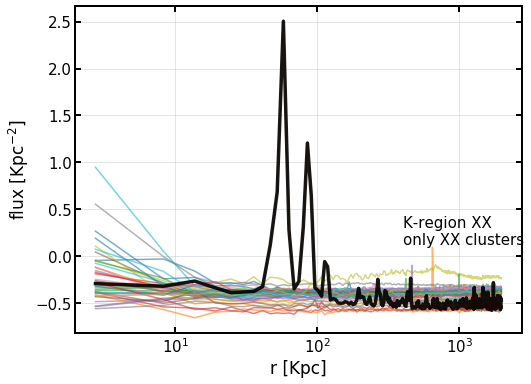

In [10]:
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
#plt.yscale('symlog')

plt.grid(alpha=0.4)

for i in range(40):
    km_re=i # km_re = kmeans region
    
    yyfactor=1.0/(0.263*cosmo.kpc_proper_per_arcmin(0.275).value/60.0)**2
    xxfactor=0.263*cosmo.kpc_proper_per_arcmin(0.275).value/60

    mea = yy_rand[km_re]*yyfactor
    rr = xx_rand[km_re]*xxfactor

    plt.plot(rr, mea, '-', lw=1.5,alpha=0.6,label='Average random')
    
km_re=11 # km_re = kmeans region

yyfactor=1.0/(0.263*cosmo.kpc_proper_per_arcmin(0.275).value/60.0)**2
xxfactor=0.263*cosmo.kpc_proper_per_arcmin(0.275).value/60

mea = yy_rand[km_re]*yyfactor
rr = xx_rand[km_re]*xxfactor

plt.plot(rr, mea, 'k-', lw=3.5,alpha=0.9,label='')
plt.text(400, 0.125, 'K-region XX'+'\n'+'only XX clusters', fontsize=15)

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=2.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=2.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)

#plt.legend(bbox_to_anchor=(0.6, 0.98), loc=2, fontsize=12,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

# redMaPPer points

In [11]:
ini_file= 'redmapper_y1.ini'
config = configparser.ConfigParser()
inifile = config.read(ini_file)
input_dir_rdmp=config.get('input', 'input_dir')
catalog=config.get('input', 'catalog_file')
flag_files_rdmp=[ii.strip() for ii in config.get('input', 'flag_files').split(',')]
save_dir_rdmp=config.get('output', 'save_dir')
grid_output_dir_rdmp=config.get('grid_output', 'save_dir')
rdmp=pyfits.open(catalog)[1].data
flags_rdmp=np.zeros(len(rdmp))+1
indices_rdmp=np.arange(len(rdmp))

str_ngals = ['$\lambda$ = [20;30)',
             '$\lambda$ = [30;45)',
             '$\lambda$ = [45;60)',
             r'$\lambda$ = [60;$\infty$)']
richness_dir = ['richness_20_30/',
                'richness_30_45/',
                'richness_45_60/',
                'richness_60_beyond/']

# getting indices in the flag files
for file_flag in flag_files_rdmp:
    if os.path.isfile(file_flag):
        flag_dat=np.loadtxt(file_flag, dtype=[('index', int), ('flag', int)], skiprows=1)
        flag=flag_dat['flag']
        if len(flag) == len(flags_rdmp):
            flags_rdmp=flags_rdmp*flag

ind1, =np.where( (flags_rdmp > 0.5) & (flags_rdmp<1.5) & (rdmp['lambda_chisq']>= 20) & (rdmp['lambda_chisq'] < 30))
print(len(ind1), len(indices_rdmp))
ind2, =np.where( (flags_rdmp > 0.5) & (flags_rdmp<1.5) & (rdmp['lambda_chisq']>= 30) & (rdmp['lambda_chisq'] < 45))
print(len(ind2), len(indices_rdmp))
ind3, =np.where( (flags_rdmp > 0.5) & (flags_rdmp<1.5) & (rdmp['lambda_chisq']>= 45) & (rdmp['lambda_chisq'] < 60))
print(len(ind3), len(indices_rdmp))
ind4, =np.where( (flags_rdmp > 0.5) & (flags_rdmp<1.5) & (rdmp['lambda_chisq']>= 60) & (rdmp['lambda_chisq'] < 40000000))
print(len(ind4), len(indices_rdmp))

307 7066
152 7066
52 7066
32 7066


#### Removing indices that has no profiles

In [55]:
ngal_bins=1
inds = [ind1,ind2,ind3,ind4]
ind = inds[ngal_bins-1]
Ncl = len(ind)

####
second_path_rdmp = 'rdmp6417_output_mask35_v2/'
dat_type=[('distance', float), ('mean', float), ('median', float)]
dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]

to_be_removed = []

for jji, jj in enumerate(ind):  # jji is an index from 0 to 356
                                # jj is the cluster id
    
    file_jj_r=input_dir_rdmp+second_path_rdmp+'object_%i/profile_%i_r.txt'%(jj,jj)
    if os.path.isfile(file_jj_r):
        continue
    else:
        print('there is no profile for the cluster  with index '+str(jj))
        to_be_removed.append(jj)


# remove the clusters indices that there is no profiles
for rem in to_be_removed:
    if rem in ind:
        ind = np.delete(ind, list(ind).index(rem))
    
print('total number of clusters to use: '+str(len(ind)))
        

there is no profile for the cluster  with index 3132
there is no profile for the cluster  with index 3173
total number of clusters to use: 305


#### dividing by rmem

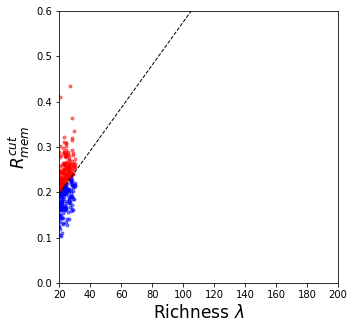

In [56]:
def rm_mrr(Lambda): #McClintock relation
    X_piv, z_piv = 40., 0.35
    A0, B0, C0, Z0 = 14.489,  1.356, -0.30, 0.275
    return (10.**A0) * ((Lambda/ X_piv)**B0)  * (((1+Z0) / (1+z_piv)) **(C0))

def criticaldens(z): # Critical density function  
    from astropy import units as u
    SolarM = u.Msun # solar masses
    kpc3 = u.kpc * u.kpc * u.kpc # Mpc^3
    Conv_factor = SolarM / kpc3
    rhoc_ = cosmo.critical_density(z)
    rhoc = rhoc_.to(Conv_factor)
    return rhoc.value

clusters = rdmp[ind]
len(clusters)

numflag = 4
flagrmem = ['', '_rmem_rlambda','_rmem_r200', '_rmem_scaled', '_2cuts', '_2cuts_r200'][numflag]
# ''              = rmemcut
# '_rmem_rlambda' = rmemcut/rlambda
# '_rmem_r200'    = rmemcut/r200m
# '_rmem_scaled'  = xx_r/r200m

members = Table.read(input_dir_rdmp+'input/y1a1_gold_1.0.3-d10-mof-001d_run_redmapper_v6.4.17-vlim_lgt20_desformat_catalog_members.fit')
coefs = np.loadtxt(input_dir_rdmp+'input/y1a1_gold_1.0.3-d10-mof-001d_run_redmapper_v6.4.17-vlim_lgt20_desformat_catalog.fit_coefs%s.txt'%(flagrmem))


pm = members['P']*members['PFREE']*members['THETA_R']*members['THETA_I']

Pcrit = (pm > 0.8)

Rmemcut = []
lambda_ = []
for clid in clusters['MEM_MATCH_ID']:
    clusterid = (members['MEM_MATCH_ID'] == clid)
    pi = pm[Pcrit*clusterid]
    Ri = members['R'][Pcrit*clusterid]
    Rmemcut.append(np.sum(pi*Ri)/np.sum(pi))  
    lambda_.append(np.sum(pi))
Rmemcut = np.array(Rmemcut)
lambda_ = np.array(clusters['LAMBDA_CHISQ']) # np.array(lambda_)  
z_ = np.array(clusters['Z_LAMBDA'])

if numflag == 4 and numflag != 5:
    nlistbin = [[20,30], [30,45], [45,60], [60, 150]]
    mask_rich = (np.array(lambda_)>= nlistbin[ngal_bins-1][0]) & (np.array(lambda_)< nlistbin[ngal_bins-1][1])
    ind  = ind[mask_rich]
    Rmemcut = Rmemcut[mask_rich]
    lambda_ = np.array(lambda_)[mask_rich]
    z_ = z_[mask_rich]
    
rlambda = (np.array(lambda_)/100)**0.2
m200 = rm_mrr(np.array(lambda_))
rhoc = criticaldens(z_)
rhom = cosmo.Om0 * rhoc * (1 + z_)**3
r200c = np.cbrt( (3.*m200) / (2000.*np.pi*rhoc) ) 
r200m = np.cbrt( (3.*m200) / (2000.*np.pi*rhom) ) 

if numflag != 4 and numflag != 5:
    std0 = 0.48*coefs[ngal_bins-1][3]

if numflag != 4 and numflag != 5:
    R1 = coefs[ngal_bins-1][1]*np.array(lambda_)+coefs[ngal_bins-1][2]+std0
    R2 = coefs[ngal_bins-1][1]*np.array(lambda_)+coefs[ngal_bins-1][2]-std0
    
else:
    Rmed = coefs[ngal_bins-1][1]*np.array(lambda_)+coefs[ngal_bins-1][2]

if numflag==0:
    Rcut = Rmemcut
if numflag==1:
    Rcut = Rmemcut/rlambda
if numflag==2:
    Rcut = Rmemcut/r200m
if numflag==3:
    Rcut = Rmemcut
if numflag==4:
    Rcut = Rmemcut
if numflag==5:
    Rcut = Rmemcut
    
    
if numflag != 4 and numflag != 5:
    std0 = 0.48*coefs[ngal_bins-1][3]
    diff1 = (Rcut-R1)>=0
    diff2 = (Rcut-R2)<0
    diff = ~diff1*~diff2

    lambda_up, Rcut_up = np.array(lambda_)[diff1], np.array(Rcut)[diff1]
    lambda_cen, Rcut_cen = np.array(lambda_)[diff], np.array(Rcut)[diff]
    lambda_low, Rcut_low = np.array(lambda_)[diff2], np.array(Rcut)[diff2]
    #print(len(Rcut_up), len(Rcut_cen), len(Rcut_low))

    up_ind  = ind[diff1]
    cen_ind = ind[diff]
    low_ind = ind[diff2]
    
else:
    diff1 = (Rcut-Rmed)>=0
    diff2 = (Rcut-Rmed)<0
    
    lambda_up, Rcut_up = np.array(lambda_)[diff1], np.array(Rcut)[diff1]
    lambda_low, Rcut_low = np.array(lambda_)[diff2], np.array(Rcut)[diff2]
    #print(len(lambda_up), len(lambda_low))

    up_ind  = ind[diff1]
    low_ind = ind[diff2]
    
ngalsbins=np.arange(0, 201, 10)

plt.figure(1, figsize=(5, 5))
plt.plot(lambda_up, Rcut_up, 'ro', markersize=3, alpha=0.5)
if numflag != 4 and numflag != 5:
    plt.plot(lambda_cen, Rcut_cen, 'go', markersize=3, alpha=0.5)
plt.plot(lambda_low, Rcut_low, 'bo', markersize=3, alpha=0.5)
plt.plot(ngalsbins, coefs[ngal_bins-1][1]*ngalsbins+coefs[ngal_bins-1][2], '--',lw=1, color='k', label='median fitting')
plt.xlim(20, 200)
plt.ylim(0, 0.6)
plt.xlabel('Richness $\lambda$', fontsize=17)
if numflag==0 or numflag==3:
    plt.ylabel('$R_{mem}^{cut}$', fontsize=17)
if numflag==1:
    plt.ylabel('$R_{mem}^{cut}$/$R_{\lambda}}$', fontsize=17)
if numflag==2:
    plt.ylabel('$R_{mem}^{cut}$/$R_{200}}$', fontsize=17)
if numflag==4:
    plt.ylabel('$R_{mem}^{cut}$', fontsize=17)
if numflag==5:
    plt.ylabel('$R_{mem}^{cut}$/$R_{200}}$', fontsize=17)
plt.show()

#### The funtion below is for getting the cluster profile for a given redshift

In [58]:
len(up_ind)

166

In [47]:
print(up_ind, low_ind)
# [ 25  65  68  93 125 176 196 235 236 288 382 388] [  3  10  57  60  66 101 115 124 139 143 162 164 175 202 242 421]

[  6  25  36  65  68  71  93 125 176 196 235 236 288 382 388 435] [  3  10  57  60  66 101 115 124 139 143 162 164 175 202 242 421]


/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


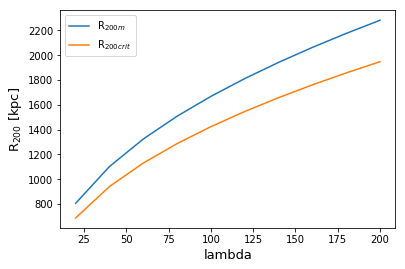

In [48]:
lambda_ = np.linspace(20,200,10.)
m200m = rm_mrr(np.array(lambda_))
z_ = 0.275
rhoc = criticaldens(0.275)
rhom = cosmo.Om0 * rhoc * (1 + z_)**3
r200m = np.cbrt( (3.*m200m) / (2000.*np.pi*rhom) ) 
r200c = np.cbrt( (3.*m200m) / (2000.*np.pi*rhoc) ) 

plt.plot(lambda_, r200m, '-', label='R$_{200m}$')
plt.plot(lambda_, r200c, '-', label='R$_{200crit}$')
plt.legend()
plt.xlabel('lambda', fontsize=13)
plt.ylabel('R$_{200}$ [kpc]', fontsize=13)
plt.show()

In [49]:
def z_to_mean_rdmp(z_, ind, nbins, input_dir, second_path):
    
    ####
    
    input_dir='/home/hillysson/diffuselight_dataproc/dlight/'
    second_path='rdmp6417_output_mask35_v2/'
    dat_type=[('distance', float), ('mean', float), ('median', float)]
    
    file_jj_r=input_dir+second_path+'object_%i/profile_%i_r.txt'%(ind,ind)

    if os.path.isfile(file_jj_r):
        data_r=np.loadtxt(file_jj_r, dtype=dat_type)

        #xxfactor=cosmo.kpc_proper_per_arcmin(z_).value*0.263/60
        #yyfactor=1.0/(xxfactor**2)

        if len(data_r['distance'])==nbins:
            yy_r     = data_r['mean']#*yyfactor
            xx       = data_r['distance']#*xxfactor
    
    return xx, yy_r

# Subtracting the cluster profile from the random profile

In [50]:
coord_rdmp=np.transpose( np.array([rdmp[ind]['ra'], rdmp[ind]['dec']]) )
centers=np.loadtxt('centers.txt')
labels_rdmp=kmeans_radec.find_nearest(coord_rdmp, centers)

In [51]:
nbins=359
#xxbins = np.arange(0.0,2000.1, 2000/nbins )
#phy_xx = (xxbins[:-1]+xxbins[1:])/2


import time
import multiprocessing
from multiprocessing import Pool
from scipy.interpolate import interp1d

os.system('mkdir '+save_dir_rdmp+'subtracted_profiles') 
os.system('mkdir '+save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]) 
dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]

def sub_profiles(jj):
    

    #print(jj)

    start = time.time()

    zp_= rdmp['Z_LAMBDA'][jj]

    xx_rdmp, yy_r_rdmp=z_to_mean_rdmp(zp_, jj, nbins, input_dir_rdmp,second_path_rdmp)

    km_re = labels_rdmp[list(ind).index(jj)] # km_re = kmeans region

    yy_r_sub_  = yy_r_rdmp - yy_rand[km_re]

    # clusters: m200m and r200m
    lambda_= rdmp['LAMBDA_CHISQ'][jj]
    m200m = rm_mrr(np.array(lambda_))  
    rhoc = criticaldens(zp_)
    rhom = cosmo.Om0 * rhoc * (1 + z_)**3
    r200m = np.cbrt( (3.*m200m) / (2000.*np.pi*rhom) ) 
    r200c = np.cbrt( (3.*m200m) / (2000.*np.pi*rhoc) ) 
    if flagrmem != '_2cuts_r200':
        r200m = 1.

    yy_fact=(1+zp_)**4.0/1.275**4.0
    xx_temp=(0.263*cosmo.kpc_proper_per_arcmin(zp_).value/60)*(xx_rdmp/r200m)
    xx_grid=(0.263*cosmo.kpc_proper_per_arcmin(0.275).value/60)*(xx_rdmp/r200m)
    func=interp1d(xx_temp, yy_r_sub_, fill_value = 'extrapolate')
    yy_r_sub=func(xx_grid)*yy_fact

    #z=list(zip(phy_xx, yy_g_sub, yy_g_sub_med, yy_r_sub, yy_r_sub_med, integrated))
    #np.savetxt(dir_sub+'subtracted_profile_%i.txt'%jj, z, fmt='%f, %f, %f, %f, %f, %f', header='# xx, g_mean, g_median, r_mean, r_median, integrated_r')
    z=list(zip(xx_grid, yy_r_sub))
    np.savetxt(dir_sub+'subtracted_profile_uprmem_%i%s.txt'%(jj,flagrmem), z, fmt='%f, %f', header='# xx, r_mean')
    print(str(list(up_ind).index(jj))+": %f sec" % (time.time() - start))

    return
        
if __name__ == "__main__": 

    pool = Pool(processes=4)
    pool.map(sub_profiles, up_ind)
    #pool.map(sub, up_ind)

np.savetxt(dir_sub+'uprmem_indices%s.txt'%(flagrmem), up_ind, fmt='%i', header='# Index')

#sub_profiles(151)    
#sub_profiles(4688)
#sub_profiles(4701)
#sub_profiles(ind[1])


0: 0.185834 sec
1: 0.187731 sec
3: 0.184355 sec
2: 0.190888 sec
5: 0.041556 sec
6: 0.038683 sec
4: 0.052255 sec
7: 0.063384 sec
8: 0.034467 sec
9: 0.070763 sec
11: 0.046987 sec
10: 0.067971 sec
12: 0.038722 sec
13: 0.022533 sec
14: 0.039496 sec
15: 0.045180 sec


In [52]:
np.mean(rdmp['lambda_chisq'][up_ind]), np.mean(rdmp['lambda_chisq'][low_ind])
# (24.107174, 23.825636)
# (35.349052, 36.152954)
# (50.47321, 49.85351)
# (81.422554, 77.90946)

(84.655975, 77.90946)

In [53]:
nbins=359
#xxbins = np.arange(0.0,2000.1, 2000/nbins )
#phy_xx = (xxbins[:-1]+xxbins[1:])/2


import time
import multiprocessing
from multiprocessing import Pool
from scipy.interpolate import interp1d

os.system('mkdir '+save_dir_rdmp+'subtracted_profiles') 
os.system('mkdir '+save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]) 
dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]

def sub_profiles(jj):
    

    start = time.time()

    zp_= rdmp['Z_LAMBDA'][jj]

    xx_rdmp, yy_r_rdmp=z_to_mean_rdmp(zp_, jj, nbins, input_dir_rdmp,second_path_rdmp)

    km_re = labels_rdmp[list(ind).index(jj)] # km_re = kmeans region

    yy_r_sub_  = yy_r_rdmp - yy_rand[km_re]


    # clusters: m200m and r200m
    lambda_= rdmp['LAMBDA_CHISQ'][jj]
    m200m = rm_mrr(np.array(lambda_))
    rhoc = criticaldens(zp_)
    rhom = cosmo.Om0 * rhoc * (1 + z_)**3
    r200m = np.cbrt( (3.*m200m) / (2000.*np.pi*rhom) ) 
    r200c = np.cbrt( (3.*m200m) / (2000.*np.pi*rhoc) ) 
    if flagrmem != '_2cuts_r200':
        r200m = 1.

    yy_fact=(1+zp_)**4.0/1.275**4.0
    xx_temp=(0.263*cosmo.kpc_proper_per_arcmin(zp_).value/60)*(xx_rdmp/r200m)
    xx_grid=(0.263*cosmo.kpc_proper_per_arcmin(0.275).value/60)*(xx_rdmp/r200m)
    func=interp1d(xx_temp, yy_r_sub_, fill_value = 'extrapolate')
    yy_r_sub=func(xx_grid)*yy_fact


    #z=list(zip(phy_xx, yy_g_sub, yy_g_sub_med, yy_r_sub, yy_r_sub_med, integrated))
    #np.savetxt(dir_sub+'subtracted_profile_%i.txt'%jj, z, fmt='%f, %f, %f, %f, %f, %f', header='# xx, g_mean, g_median, r_mean, r_median, integrated_r')
    z=list(zip(xx_grid, yy_r_sub))
    np.savetxt(dir_sub+'subtracted_profile_cenrmem_%i%s.txt'%(jj,flagrmem), z, fmt='%f, %f', header='# xx, r_mean')
    print(str(list(cen_ind).index(jj))+": %f sec" % (time.time() - start))

    return

if numflag != 4 and numflag != 5:
    if __name__ == "__main__": 

        pool = Pool(processes=4)
        pool.map(sub_profiles, cen_ind)

    np.savetxt(dir_sub+'cenrmem_indices%s.txt'%(flagrmem), cen_ind, fmt='%i', header='# Index')

#sub_profiles(151)    
#sub_profiles(4688)
#sub_profiles(4701)
#sub_profiles(ind[1])


In [54]:
nbins=359
#xxbins = np.arange(0.0,2000.1, 2000/nbins )
#phy_xx = (xxbins[:-1]+xxbins[1:])/2


import time
import multiprocessing
from multiprocessing import Pool
from scipy.interpolate import interp1d

os.system('mkdir '+save_dir_rdmp+'subtracted_profiles') 
os.system('mkdir '+save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]) 
dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]

def sub_profiles(jj):
    
    #print(jj)    
       
    start = time.time()

    zp_= rdmp['Z_LAMBDA'][jj]

    xx_rdmp, yy_r_rdmp=z_to_mean_rdmp(zp_, jj, nbins, input_dir_rdmp,second_path_rdmp)

    km_re = labels_rdmp[list(ind).index(jj)] # km_re = kmeans region

    yy_r_sub_  = yy_r_rdmp - yy_rand[km_re]

    # clusters: m200m and r200m
    lambda_= rdmp['LAMBDA_CHISQ'][jj]
    m200m = rm_mrr(np.array(lambda_))
    rhoc = criticaldens(zp_)
    rhom = cosmo.Om0 * rhoc * (1 + z_)**3
    r200m = np.cbrt( (3.*m200m) / (2000.*np.pi*rhom) ) 
    r200c = np.cbrt( (3.*m200m) / (2000.*np.pi*rhoc) ) 
    if flagrmem != '_2cuts_r200':
        r200m = 1.

    yy_fact=(1+zp_)**4.0/1.275**4.0
    xx_temp=(0.263*cosmo.kpc_proper_per_arcmin(zp_).value/60)*(xx_rdmp/r200m)
    xx_grid=(0.263*cosmo.kpc_proper_per_arcmin(0.275).value/60)*(xx_rdmp/r200m)
    func=interp1d(xx_temp, yy_r_sub_, fill_value = 'extrapolate')
    yy_r_sub=func(xx_grid)*yy_fact


    #z=list(zip(phy_xx, yy_g_sub, yy_g_sub_med, yy_r_sub, yy_r_sub_med, integrated))
    #np.savetxt(dir_sub+'subtracted_profile_%i.txt'%jj, z, fmt='%f, %f, %f, %f, %f, %f', header='# xx, g_mean, g_median, r_mean, r_median, integrated_r')
    z=list(zip(xx_grid, yy_r_sub))
    np.savetxt(dir_sub+'subtracted_profile_lowrmem_%i%s.txt'%(jj,flagrmem), z, fmt='%f, %f', header='# xx, r_mean')
    print(str(list(low_ind).index(jj))+": %f sec" % (time.time() - start))

    return

    
if __name__ == "__main__": 

    pool = Pool(processes=4)
    pool.map(sub_profiles, low_ind)
    
np.savetxt(dir_sub+'lowrmem_indices%s.txt'%(flagrmem), low_ind, fmt='%i', header='# Index')

#sub_profiles(151)    
#sub_profiles(4688)
#sub_profiles(4701)
#sub_profiles(ind[1])


2: 0.029497 sec
0: 0.061418 sec
1: 0.066891 sec
3: 0.074406 sec
4: 0.046539 sec
5: 0.029326 sec
7: 0.037181 sec
8: 0.064519 sec
6: 0.052716 sec
10: 0.034037 sec
9: 0.056417 sec
11: 0.022424 sec
12: 0.020454 sec
13: 0.034521 sec
14: 0.042285 sec
15: 0.039633 sec
